In [162]:
from glob import glob
import sys 
import pandas as pd
from nltk import sent_tokenize

In [163]:
subs = []
file_paths = glob('/Users/brighttenkorangofori/Desktop/naruto/data/subtitles/*')
file_paths.sort()
for path in file_paths:
    with open(path,'r') as f:
        texts = f.readlines()[27:]
        texts = [text.split(',,')[-1] for text in texts]
        texts = [text.replace('\\N',' ') for text in texts]
        texts = [text.replace('\n','') for text in texts]
        
        subs.append(texts)


subs[0]


['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,',
 'it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!",
 'One great Ninja was able to imprison the monster,',
 'but died in the process.',
 'This Ninja was known as… the Fourth Hokage.',
 'Naruto!',
 'Why did you do such a thing?!',
 "You're really gonna get it this time!",
 "I don't care!",
 'You know your problem?',
 "You can't do the things I do!",
 'Only I can do this!',
 "I'm better than all of you! Believe it!",
 "There's a problem, sir!",
 'Lord Hokage!',
 'What is it?',
 'Did that Naruto do something again?',
 'Yes. He climbed onto the Mountainside Images…',
 'And he vandalized and graffitied all over them!',
 'Wait!',
 'Ha ha…',
 'Why should I?',
 'Hey, Naruto!',
 'How did you suddenly get here, lruka Sensei?',
 'The q

In [164]:
scripts = [''.join(sub) for sub in subs]

In [165]:
scripts[0]

'A long time ago, a powerful demon fox appeared with nine tails.With its powerful tails,it could smash mountains and create tidal waves.A band of Ninjas rose to defend their village from attack.We have to wait until the Fourth Hokage gets here!We can\'t let it get any closer to our village!One great Ninja was able to imprison the monster,but died in the process.This Ninja was known as… the Fourth Hokage.Naruto!Why did you do such a thing?!You\'re really gonna get it this time!I don\'t care!You know your problem?You can\'t do the things I do!Only I can do this!I\'m better than all of you! Believe it!There\'s a problem, sir!Lord Hokage!What is it?Did that Naruto do something again?Yes. He climbed onto the Mountainside Images…And he vandalized and graffitied all over them!Wait!Ha ha…Why should I?Hey, Naruto!How did you suddenly get here, lruka Sensei?The question is what are you doing here when you should be in class now?Now listen, Naruto.You failed the last graduation test and the one b

In [166]:
seasons = []
episodes = []
for path in file_paths:
    season = int(path.split('Season')[-1].split('-')[0].strip())
    seasons.append(season)
    episode = int(path.split('-')[-1].split('.')[0])
    episodes.append(episode)

In [167]:
df = pd.DataFrame({'scripts' : scripts,
                   'seasons': seasons,
                   'episodes': episodes})

In [168]:
df.head()

,scripts,seasons,episodes
0,"A long time ago, a powerful demon fox appeared...",1,1
1,"C'mon!Running like a fugitive,Being chased by ...",1,2
2,"C'mon!Running like a fugitive,Being chased by ...",1,3
3,"C'mon!Running like a fugitive,Being chased by ...",1,4
4,"C'mon!Running like a fugitive,Being chased by ...",1,5


In [169]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [170]:
df.scripts[0]

'A long time ago, a powerful demon fox appeared with nine tails.With its powerful tails,it could smash mountains and create tidal waves.A band of Ninjas rose to defend their village from attack.We have to wait until the Fourth Hokage gets here!We can\'t let it get any closer to our village!One great Ninja was able to imprison the monster,but died in the process.This Ninja was known as… the Fourth Hokage.Naruto!Why did you do such a thing?!You\'re really gonna get it this time!I don\'t care!You know your problem?You can\'t do the things I do!Only I can do this!I\'m better than all of you! Believe it!There\'s a problem, sir!Lord Hokage!What is it?Did that Naruto do something again?Yes. He climbed onto the Mountainside Images…And he vandalized and graffitied all over them!Wait!Ha ha…Why should I?Hey, Naruto!How did you suddenly get here, lruka Sensei?The question is what are you doing here when you should be in class now?Now listen, Naruto.You failed the last graduation test and the one b

In [171]:
def names_entities(episode):
    names = []
    episode_sentences = sent_tokenize(episode)
    for sentence in episode_sentences:
        doc = nlp(sentence)
        sets = set()
        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                full_name = ent.text.split(' ')
                first = full_name[0]
                sets.add(first)
        names.append(list(sets))
    return names

In [172]:
df['names'] = df['scripts'].apply(names_entities)

In [173]:
df['names']

0      [[], [], [Believe], [Naruto], [Sakura], [Sasuk...
1      [[Rockin], [], [], [Hokage], [], [], [], [], [...
2      [[Rockin, Naruto, heartToday's, Sakura], [Saku...
3      [[Rockin, Iruka, Naruto], [], [Jonin], [!I], [...
4      [[Rockin, Jutsu], [Sasuke], [], [], [Sasuke], ...
                             ...                        
215    [[Jutsu!Oh], [], [], [], [], [], [], [], [], [...
216    [[Gaara, Kankuro], [], [], [], [Leaf!Well], []...
217    [[Gaara, Kankuro], [], [], [Gaara], [], [], []...
218    [[], [], [Lee], [], [Gaara, Jutsu, Sakura], []...
219    [[], [], [Gaara, Shut], [], [Gaara, Sakura], [...
Name: names, Length: 220, dtype: object

In [174]:
a = [['Gaara', 'Kankuro'], [], [], [], ['Leaf','Well']]
a = a[-5:]

flattened = sum(a, [])
flattened



['Gaara', 'Kankuro', 'Leaf', 'Well']

In [175]:
def get_relationship_pairs(df):
    window=10
    entity_relationship = []

    for row in df['names']:
        previous_entities_in_window = []
        
        for sentence in row:
            previous_entities_in_window.append(sentence)
            previous_entities_in_window = previous_entities_in_window[-10:]
            
            previous_entities_flattened= sum(previous_entities_in_window, [])
            
            for entity in sentence:            
                for entity_in_window in previous_entities_flattened:
                    if entity!=entity_in_window:
                        entity_rel = sorted([entity,entity_in_window])
                        entity_relationship.append(entity_rel)
    return entity_relationship

In [176]:
entity_relationship = get_relationship_pairs(df)


In [177]:
entity_relationship[0]

['Believe', 'Naruto']

In [178]:
relationship_df  = pd.DataFrame({'value':entity_relationship})



In [179]:
relationship_df

,value
0,"[Believe, Naruto]"
1,"[Believe, Sakura]"
2,"[Naruto, Sakura]"
3,"[Believe, Sasuke]"
4,"[Naruto, Sasuke]"
...,...
27776,"[Lady, Naruto]"
27777,"[Iruka, Naruto]"
27778,"[Lee, Naruto]"
27779,"[Lady, Naruto]"


In [180]:
relationship_df['source'] = relationship_df['value'].apply(lambda x: x[0])
relationship_df['target'] = relationship_df['value'].apply(lambda x: x[1])

In [181]:
relationship_df

,value,source,target
0,"[Believe, Naruto]",Believe,Naruto
1,"[Believe, Sakura]",Believe,Sakura
2,"[Naruto, Sakura]",Naruto,Sakura
3,"[Believe, Sasuke]",Believe,Sasuke
4,"[Naruto, Sasuke]",Naruto,Sasuke
...,...,...,...
27776,"[Lady, Naruto]",Lady,Naruto
27777,"[Iruka, Naruto]",Iruka,Naruto
27778,"[Lee, Naruto]",Lee,Naruto
27779,"[Lady, Naruto]",Lady,Naruto


In [182]:
relationship_df = relationship_df.groupby(['source', 'target']).count().reset_index()

relationship_df

,source,target,value
0,!Bushy-Brows,Gaara,7
1,!Bushy-Brows,Genjutsu,1
2,!Bushy-Brows,Guy,2
3,!Bushy-Brows,Huh?Lee,1
4,!Bushy-Brows,I'll,1
...,...,...,...
10364,what!Go,you!What,1
10365,yet!Is,you!Sakura,1
10366,yet!What,youCreeping,1
10367,yet?He,you!And,2


In [186]:
relationship_df = relationship_df.sort_values('value',ascending=False)
relationship_df = relationship_df.head(200)

In [187]:
relationship_df

,source,target,value
8766,Sakura,Sasuke,364
6172,Kakashi,Sasuke,274
7935,Naruto,Sasuke,266
5762,Jutsu,Sasuke,162
7928,Naruto,Sakura,151
...,...,...,...
1405,Bushy,Kakashi,15
7296,Lee,Sand,15
5682,Jutsu,Kekkei,15
3999,Grandma,Kunihisa,14


In [189]:
import networkx as nx
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

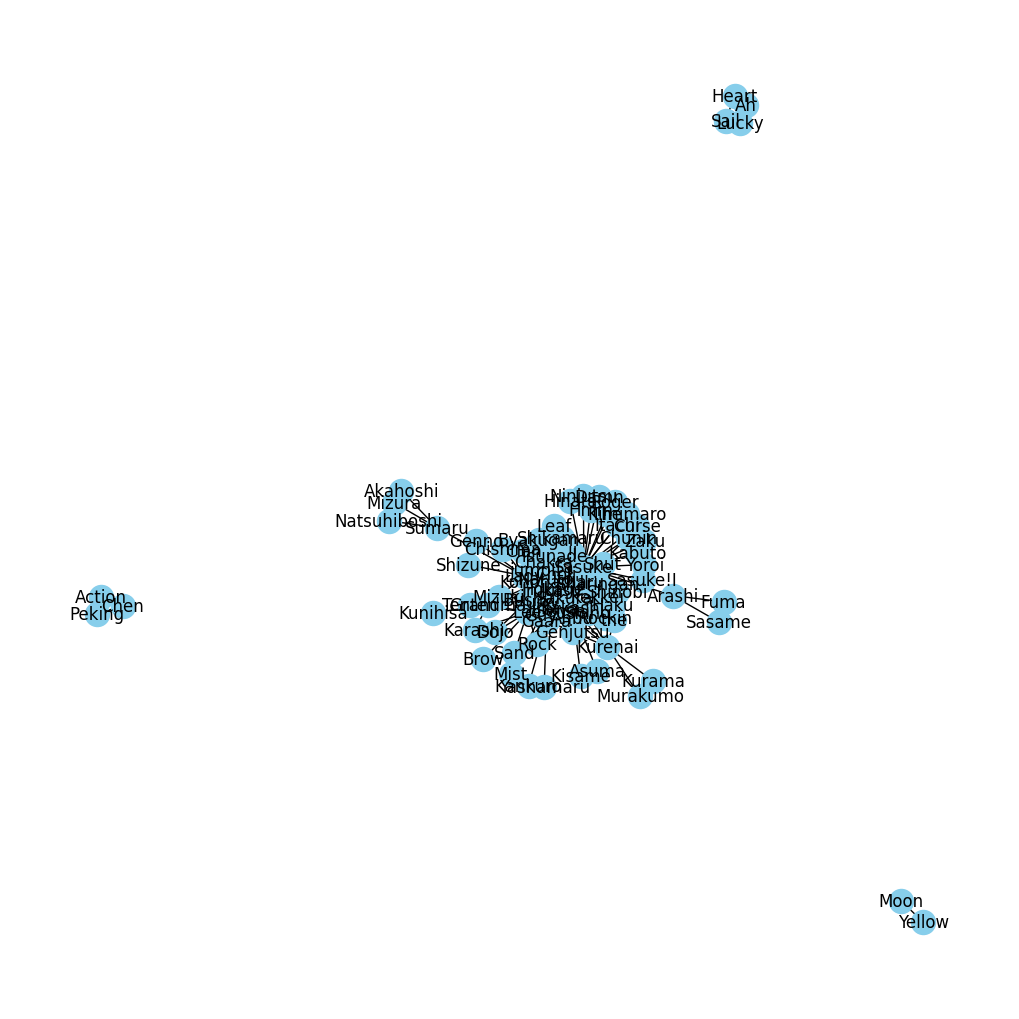

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues,)
plt.show()

In [191]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("naruto.html")



naruto.html
